In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import seaborn as sns

plt.rcParams['figure.figsize'] = [16,9]
plt.rcParams['font.size'] = 20

In [2]:
# Read in data
incidents_SS = pd.read_csv('../../data/02-clean-data/SSDB/incident.csv')
shooters_SS = pd.read_csv('../../data/02-clean-data/SSDB/shooter.csv')
victims_SS = pd.read_csv('../../data/02-clean-data/SSDB/victim.csv')
incidents_MS = pd.read_csv("../../data/02-clean-data/MSDB/school_shooters.csv")

In [4]:
# Plot locations on map

In [12]:
# Plot shootings by year

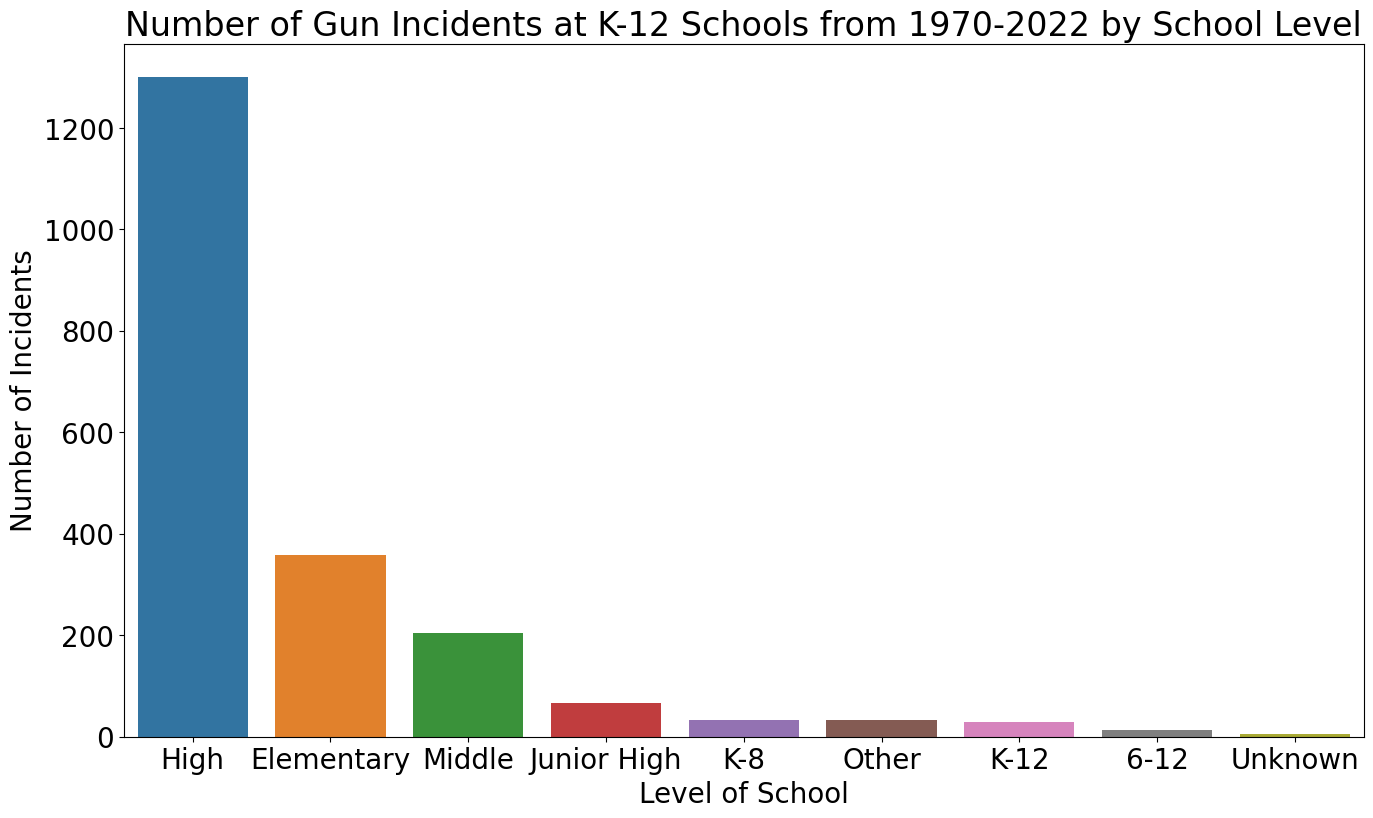

In [3]:
# Plot number of school shooting incidents by school level
plt.rcParams['figure.figsize'] = [16,9]
plt.rcParams['font.size'] = 20

# Group incidents by school level, count and sort
school_level_counts = incidents_SS.groupby('School_Level').count()['Incident_ID'].sort_values(ascending=False)

# Initialize plot
fig_levs, ax_levs = plt.subplots()

# Create plot
sns.barplot(x=school_level_counts.index, y=school_level_counts, ax=ax_levs)

# Set labels
ax_levs.set_xlabel('Level of School')
ax_levs.set_ylabel('Number of Incidents')
ax_levs.set_title('Number of Gun Incidents at K-12 Schools from 1970-2022 by School Level', fontsize=24)

# Save figure
plt.savefig('../../501-project-website/images/EDA_plots/school-level-counts.png')

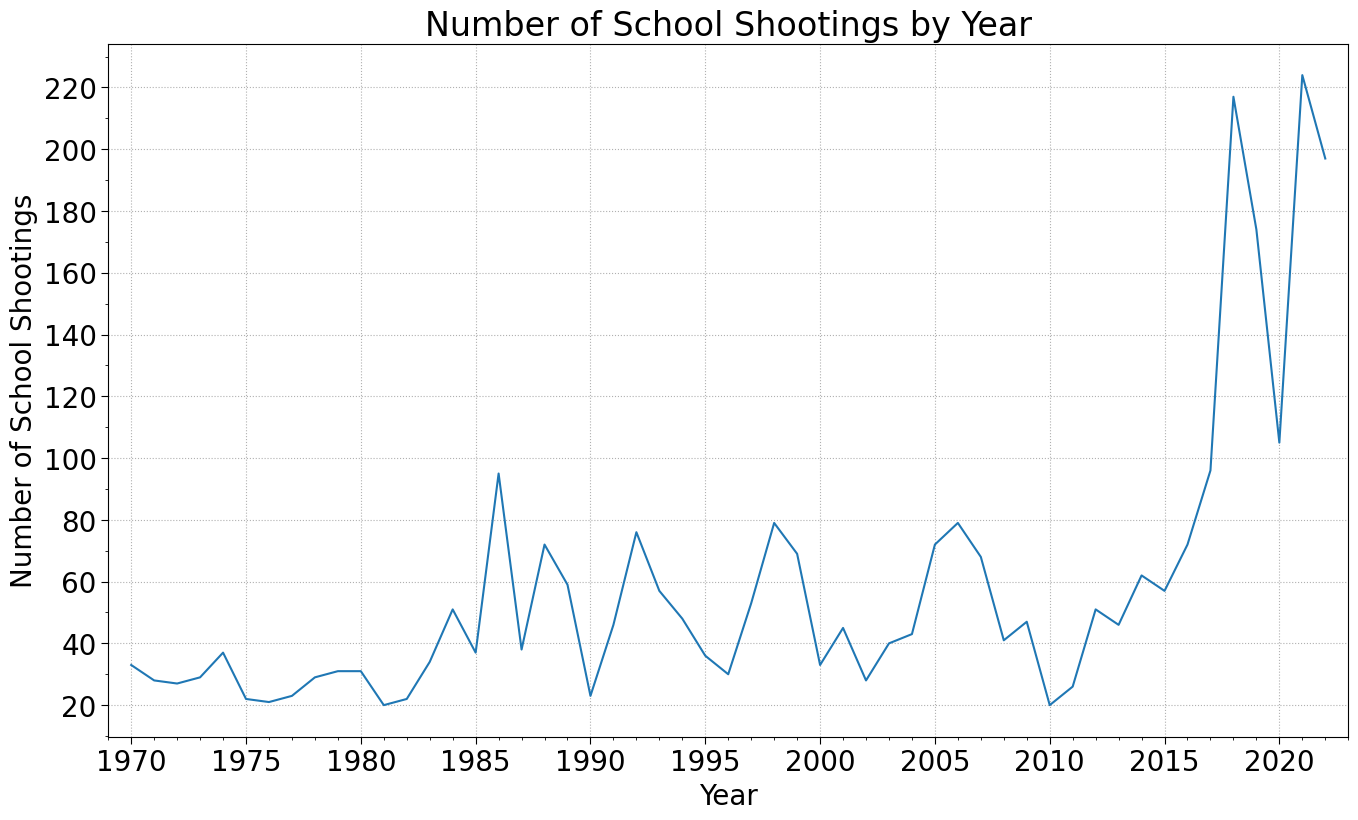

In [4]:
# Plot number of deaths by year
# Merge victim and incident data

victim_incidents = victims_SS.merge(incidents_SS, how='left', on='Incident_ID')

# Create year column from date column on which to group by
victim_incidents['Year'] = pd.to_numeric(victim_incidents['Date'].str.split('-', expand=True)[0])

# Filter on deaths only
victim_incident_deaths = victim_incidents.copy()[victim_incidents['injury'] == 'Fatal']

# Group by year and count
deaths_by_year = victim_incident_deaths.groupby('Year').count()['Incident_ID']

# Shootings by year
shootings_by_year = victim_incidents.groupby('Year').count()['Incident_ID']

# Initialize plot
fig_counts, ax_counts = plt.subplots()

# Create plot
sns.lineplot(x = shootings_by_year.index, y=shootings_by_year, ax=ax_counts)

# Set labels
ax_counts.set_xlabel('Year')
ax_counts.set_ylabel('Number of School Shootings')
ax_counts.set_title('Number of School Shootings by Year', fontsize=24)

# Adjust tick behavior
ax_counts.xaxis.set_major_locator(MultipleLocator(5))
ax_counts.xaxis.set_minor_locator(MultipleLocator(1))

ax_counts.yaxis.set_major_locator(MultipleLocator(20))
ax_counts.yaxis.set_minor_locator(MultipleLocator(10))

ax_counts.tick_params(which='minor', length=2)
ax_counts.tick_params(which='major', length=5)

# Set x limits
ax_counts.set_xlim(1969, 2023)

# Add faint grid
ax_counts.grid(True, linestyle=':')

# Save figure
plt.savefig('../../501-project-website/images/EDA_plots/incidents-by-year.png')

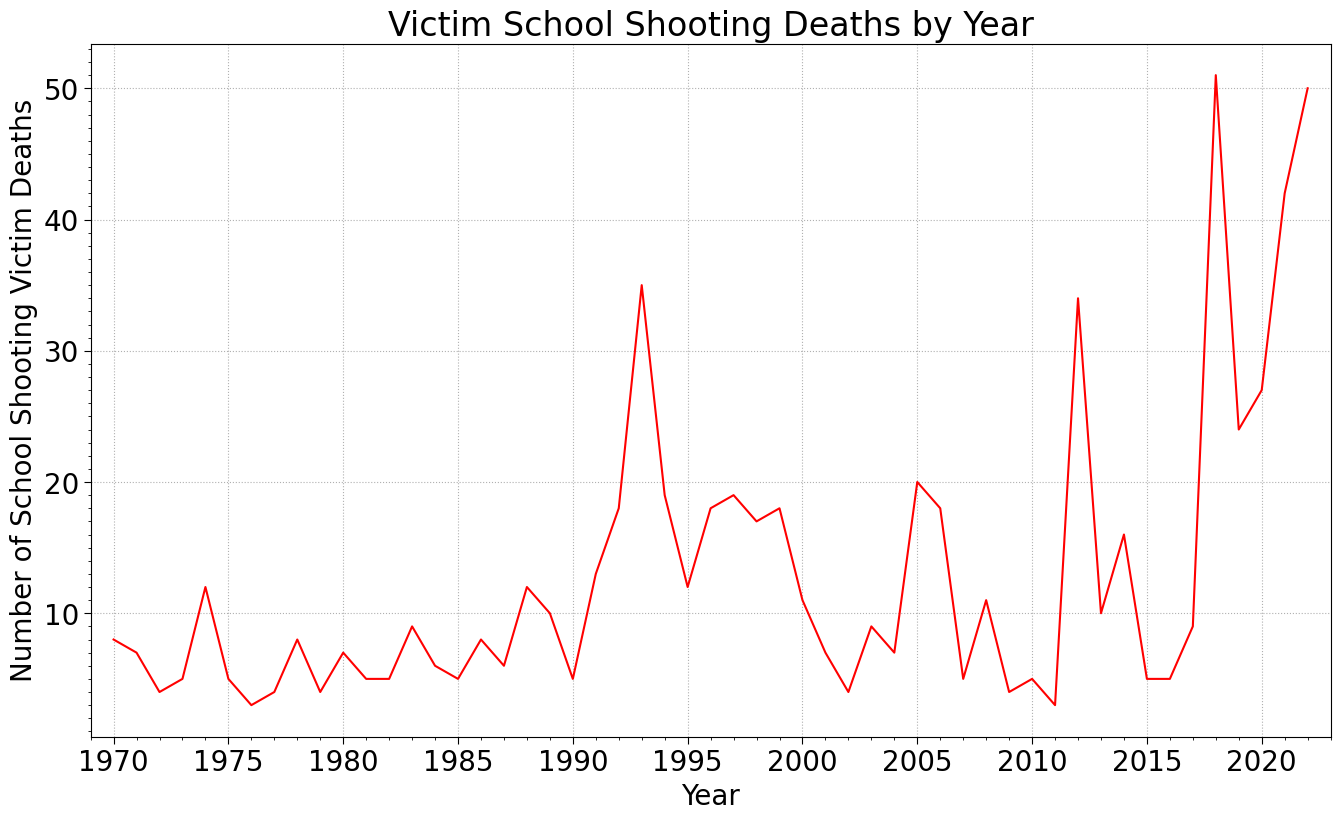

In [5]:
# Initialize plot
fig_deaths, ax_deaths = plt.subplots()

# Create plot
sns.lineplot(x = deaths_by_year.index, y=deaths_by_year, ax=ax_deaths, color='red')

# Set labels
ax_deaths.set_xlabel('Year')
ax_deaths.set_ylabel('Number of School Shooting Victim Deaths')
ax_deaths.set_title('Victim School Shooting Deaths by Year', fontsize=24)

# Adjust axis tick behavior
ax_deaths.xaxis.set_major_locator(MultipleLocator(5))
ax_deaths.xaxis.set_minor_locator(MultipleLocator(1))

ax_deaths.yaxis.set_major_locator(MultipleLocator(10))
ax_deaths.yaxis.set_minor_locator(MultipleLocator(1))

ax_deaths.tick_params(which='minor', length=2)
ax_deaths.tick_params(which='major', length=5)

# Set x limits
ax_deaths.set_xlim(1969, 2023)

# Add faint grid
ax_deaths.grid(True, linestyle=':')

# Save figure
plt.savefig('../../501-project-website/images/EDA_plots/deaths-by-year.png')

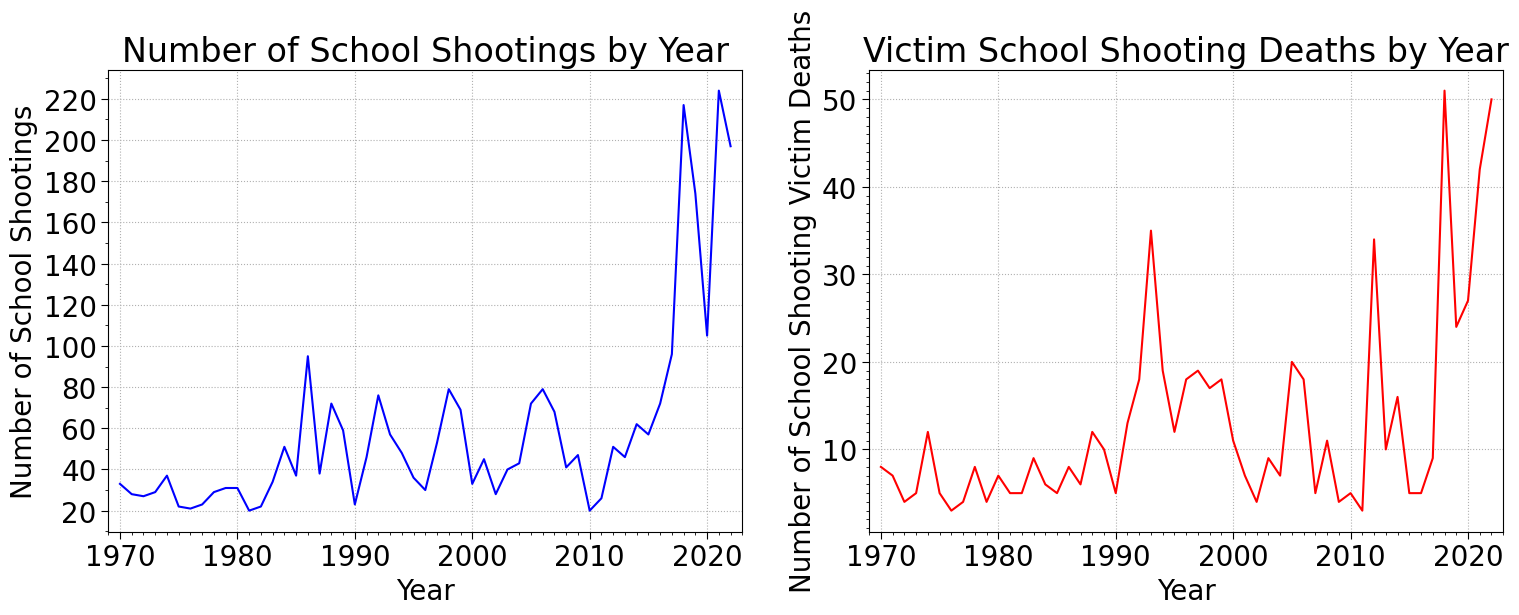

In [6]:
# Plot deaths and counts side by side
plt.rcParams['figure.figsize'] = [18,6]


# Shootings by year
shootings_by_year = victim_incidents.groupby('Year').count()['Incident_ID']

# Initialize plot
fig_comp, ax_comp = plt.subplots(nrows=1, ncols=2)

# Create plot
sns.lineplot(x = shootings_by_year.index, y=shootings_by_year, ax=ax_comp[0], color='blue')

# Set labels
ax_comp[0].set_xlabel('Year')
ax_comp[0].set_ylabel('Number of School Shootings')
ax_comp[0].set_title('Number of School Shootings by Year', fontsize=24)

# Adjust tick behavior
ax_comp[0].xaxis.set_major_locator(MultipleLocator(10))
ax_comp[0].xaxis.set_minor_locator(MultipleLocator(1))

ax_comp[0].yaxis.set_major_locator(MultipleLocator(20))
ax_comp[0].yaxis.set_minor_locator(MultipleLocator(10))

ax_comp[0].tick_params(which='minor', length=2)
ax_comp[0].tick_params(which='major', length=5)

# Set x limits
ax_comp[0].set_xlim(1969, 2023)

# Add faint grid
ax_comp[0].grid(True, linestyle=':')

# Create plot
sns.lineplot(x = deaths_by_year.index, y=deaths_by_year, ax=ax_comp[1], color='red')

# Set labels
ax_comp[1].set_xlabel('Year')
ax_comp[1].set_ylabel('Number of School Shooting Victim Deaths')
ax_comp[1].set_title('Victim School Shooting Deaths by Year', fontsize=24)

# Adjust tick behavior
ax_comp[1].xaxis.set_major_locator(MultipleLocator(10))
ax_comp[1].xaxis.set_minor_locator(MultipleLocator(1))

ax_comp[1].yaxis.set_major_locator(MultipleLocator(10))
ax_comp[1].yaxis.set_minor_locator(MultipleLocator(1))

ax_comp[1].tick_params(which='minor', length=2)
ax_comp[1].tick_params(which='major', length=5)

# Set x limits
ax_comp[1].set_xlim(1969, 2023)

# Add faint grid
ax_comp[1].grid(True, linestyle=':')

plt.savefig('../../501-project-website/images/EDA_plots/deaths_vs_incidents')

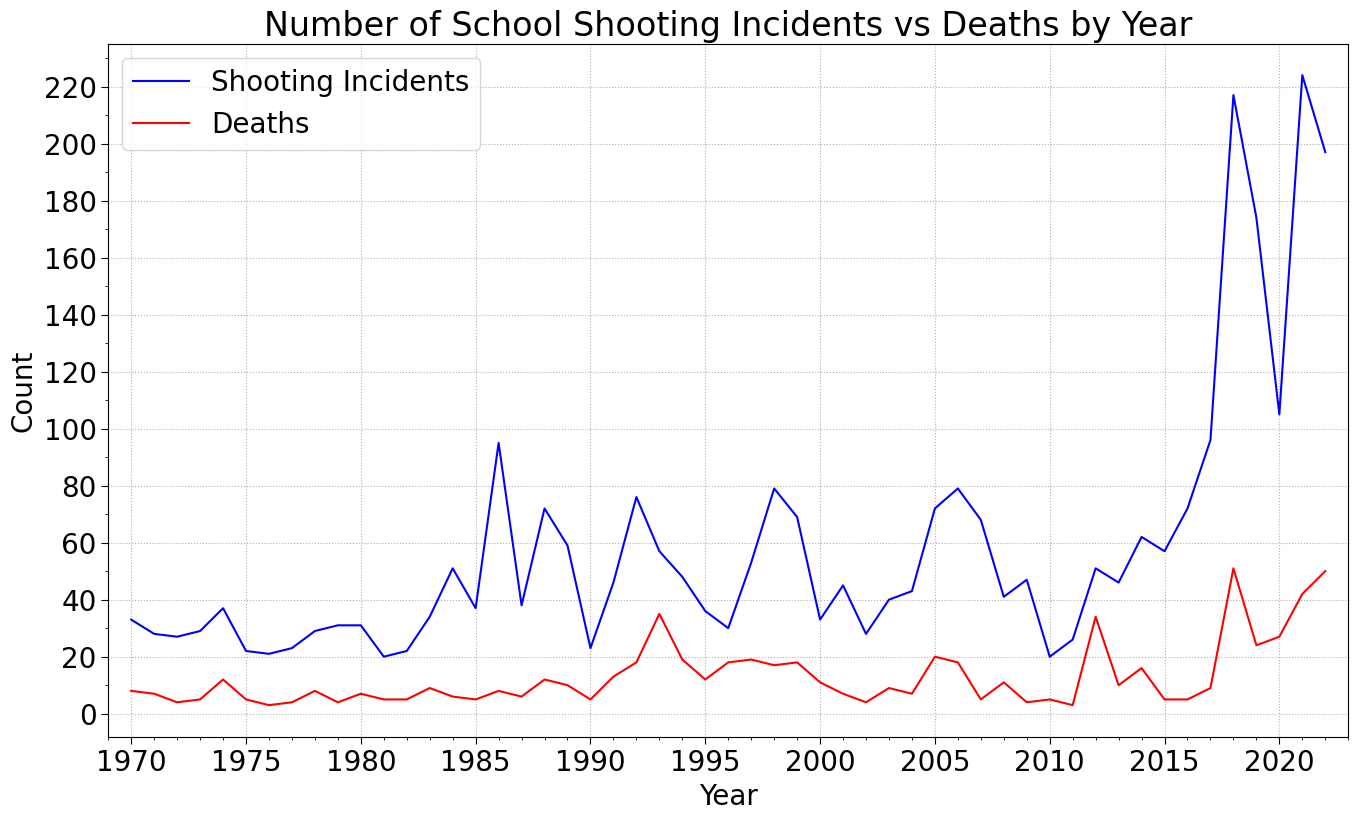

In [7]:
# Set rcparams back
plt.rcParams['figure.figsize'] = [16,9]

# Plot deaths and counts on same plot
# Initialize plot
fig_comp2, ax_comp2 = plt.subplots()

# Create plots
sns.lineplot(x = shootings_by_year.index, y=shootings_by_year, color='blue', label='Shooting Incidents', ax=ax_comp2)
sns.lineplot(x = deaths_by_year.index, y=deaths_by_year, color='red', label='Deaths', ax=ax_comp2)

# Set labels
ax_comp2.set_xlabel('Year')
ax_comp2.set_ylabel('Count')
ax_comp2.set_title('Number of School Shooting Incidents vs Deaths by Year', fontsize=24)

# Adjust tick behavior
ax_comp2.xaxis.set_major_locator(MultipleLocator(5))
ax_comp2.xaxis.set_minor_locator(MultipleLocator(1))

ax_comp2.yaxis.set_major_locator(MultipleLocator(20))
ax_comp2.yaxis.set_minor_locator(MultipleLocator(10))

ax_comp2.tick_params(which='minor', length=2)
ax_comp2.tick_params(which='major', length=5)

# Set x limits
ax_comp2.set_xlim(1969, 2023)

# Add faint grid
ax_comp2.grid(True, linestyle=':')

ax_comp2.legend()

# Save figure
plt.savefig('../../501-project-website/images/EDA_plots/deaths_vs_incidents2.png')

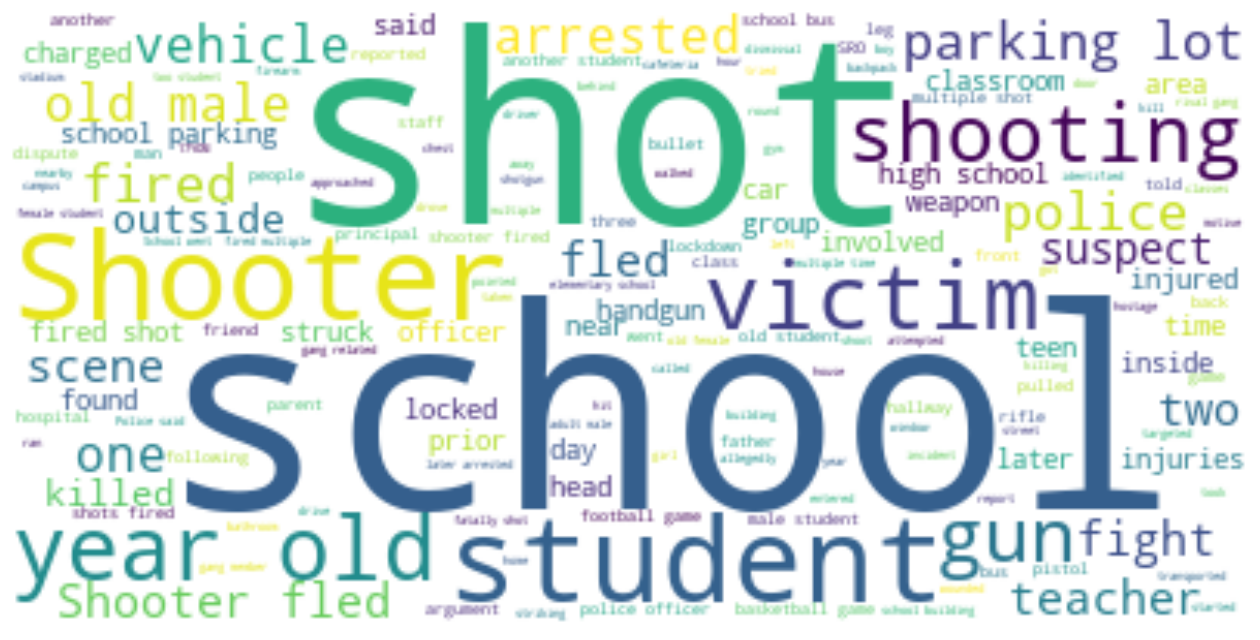

In [8]:
# Word cloud
# Code reference from https://thecleverprogrammer.com/2021/11/11/word-cloud-from-a-pandas-dataframe-in-python/
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS

# Read in data
narratives = pd.read_csv('../../data/02-clean-data/SSDB/narrative_vectors.csv')

# Combine text into one string
text = " ".join(word for word in narratives['narrative_texts'])

# Establish stopwords
stopwords = set(STOPWORDS)

# Generate word cloud
wordcloud = WordCloud(stopwords=stopwords,
                      background_color='white',
                      prefer_horizontal=1).generate(text)

# Initialize plot
fig_cloud, ax_cloud = plt.subplots()

# Plot wordcloud
ax_cloud.imshow(wordcloud, interpolation='bilinear')
ax_cloud.axis('off')

# Save figure
plt.savefig('../../501-project-website/images/EDA_plots/wordcloud.png')